In [12]:
#1_1Chargement et exploration des données
import pandas as pd
# Chargement des données
data = pd.read_csv("Salary_Data.csv")

# Affichage des premières lignes pour comprendre la structure
print(data.head()) 

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [13]:
#1_2 Séparation des variables explicatives (X) et de la variable cible (y)
# Variable explicative (années d'expérience)
X = data[['YearsExperience']].values

# Variable cible (salaire)
y = data['Salary'].values


In [14]:
#Division en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
#Construction du modèle de régression linéaire
from sklearn.linear_model import LinearRegression

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#Prédictions et comparaison avec les valeurs réelle
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage des valeurs prédites et réelles
comparison = pd.DataFrame({'Réel': y_test, 'Prédit': y_pred})
print(comparison)

       Réel         Prédit
0   37731.0   40835.105909
1  122391.0  123079.399408
2   57081.0   65134.556261
3   63218.0   63265.367772
4  116969.0  115602.645454
5  109431.0  108125.891499
6  112635.0  116537.239698
7   55794.0   64199.962017
8   83088.0   76349.687193
9  101302.0  100649.137545


In [17]:
#Estimez le salaire d'une personne ayant 15 ans d'expérience. 
#  1er methode Prédiction pour 15 ans d'expérience
salary_pred_15yrs = model.predict([[15]])
print(f"Le salaire estimé pour 15 ans d'expérience est de {salary_pred_15yrs[0]:.2f}")
#2eme methode de prédiction pour 15 ans d'expérience
b0 = model.intercept_  
b1 = model.coef_[0]   
x = 15
y = b0 + b1 * x
print(f"Le salaire estimé pour {x} ans d'expérience est de {y:.2f}")


Le salaire estimé pour 15 ans d'expérience est de 167005.33
Le salaire estimé pour 15 ans d'expérience est de 167005.33


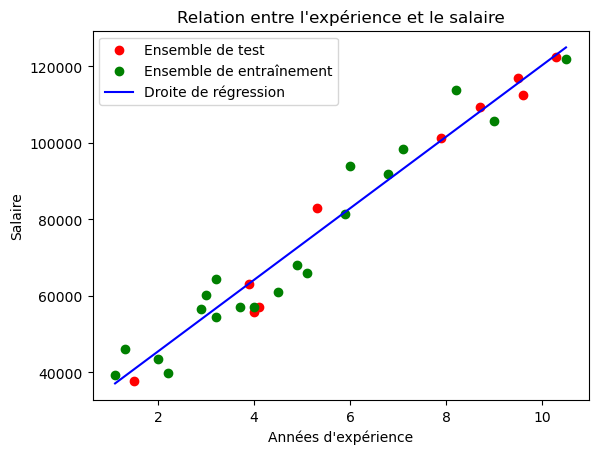

In [18]:
#Visualisation de la relation entre expérience et salaire.
import matplotlib.pyplot as plt

# Scatter plot des points de l'ensemble de test (rouge) et d'entraînement (vert)
plt.scatter(X_test, y_test, color='red', label='Ensemble de test')
plt.scatter(X_train, y_train, color='green', label='Ensemble de entraînement')

# Tracé de la droite de régression
plt.plot(X, model.predict(X), color='blue', label='Droite de régression')

plt.title("Relation entre l'expérience et le salaire")
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.legend()
plt.show()


In [23]:
#Régression Linéaire Multiple
# Chargement des données
data_startups = pd.read_csv("Startups.csv")

# Définition des variables explicatives et de la variable cible
X = data_startups[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data_startups['Profit']

# Encodage des variables catégoriques
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), ['State'])], remainder='passthrough')
X = ct.fit_transform(X)

In [24]:
 #Division en ensembles de entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [25]:
# Création et entraînement du modèle
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

LinearRegression()

In [26]:
# Vérifiez le nombre de colonnes après l'encodage
print("Colonnes après encodage OneHot:", X.shape[1])

# Prédiction pour une startup localisée à New York
# Utilisez [0, 0] pour New York (si `New York` est exclu lors de l'encodage), puis ajoutez les autres valeurs
profit_pred = model_multiple.predict([[0, 0, 130000, 140000, 300000]])
print(f"Le profit estimé pour la startup est de {profit_pred[0]:.2f}")

Colonnes après encodage OneHot: 5
Le profit estimé pour la startup est de 160548.52
